In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
df = pd.read_csv("./movies_metadata.csv")

/var/folders/qw/ppnlkp3d64s3j26nm8dvxq800000gn/T/ipykernel_24514/2308127871.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./movies_metadata.csv")


In [83]:
df.explode("genres").groupby("original_title")


{'genres'}

In [80]:
len(smth)
type(smth)

pandas.core.series.Series

In [7]:
df.size

1091184

In [28]:
df["vote_count"] = df["vote_count"].fillna(0)

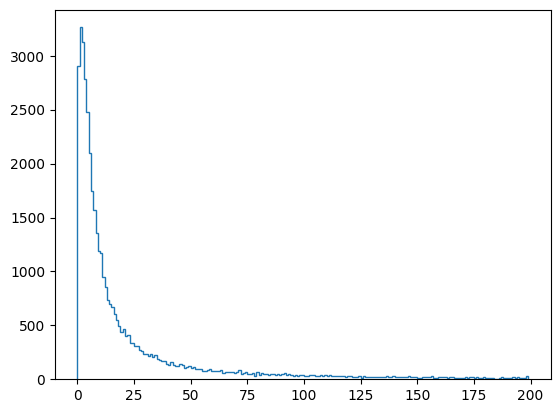

In [35]:
counts, bins = np.histogram(df[["vote_count"]], bins=[x for x in range(200)])

plt.stairs(counts, bins)

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.])

In [36]:
df = df[df["vote_count"] <= 25]

In [37]:
df.size

767232